# Task 5 : Sales Prediction Using Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### PreProcess the Data

In [4]:
df.columns = df.columns.str.strip()

In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)

##### NULL values Treatment

In [6]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

##### Duplicate values Treatment

In [7]:
df.duplicated().sum()

0

### Exploratory Data Analysis

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: xlabel='TV'>

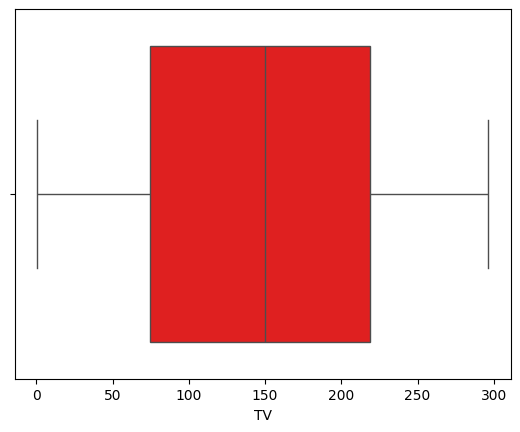

In [9]:
sns.boxplot(df['TV'],orient='h',color='red')

<Axes: xlabel='TV', ylabel='Density'>

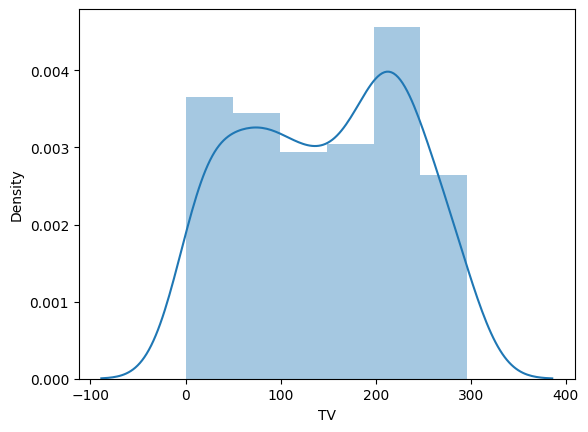

In [10]:
sns.distplot(df['TV'])

<Axes: xlabel='Radio'>

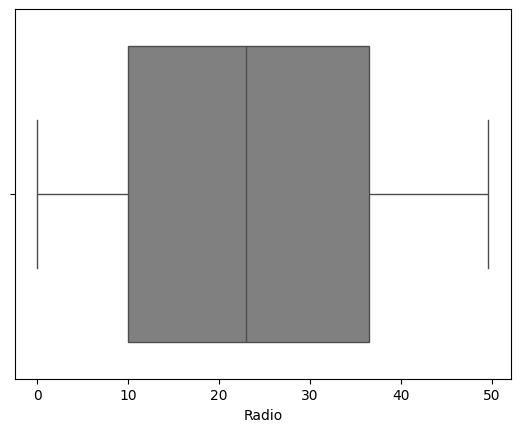

In [11]:
sns.boxplot(df['Radio'],orient='h',color='grey')

<Axes: xlabel='Radio', ylabel='Density'>

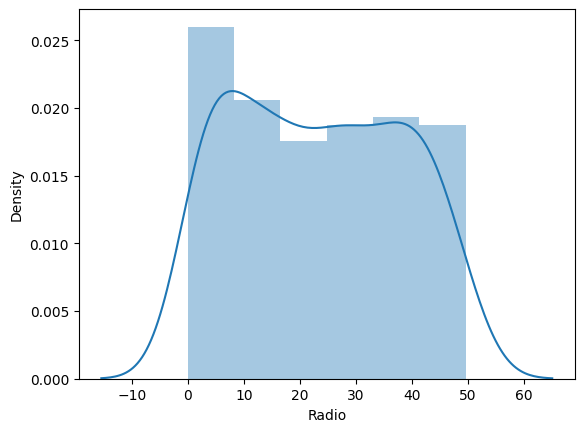

In [12]:
sns.distplot(df['Radio'])

<Axes: xlabel='Newspaper'>

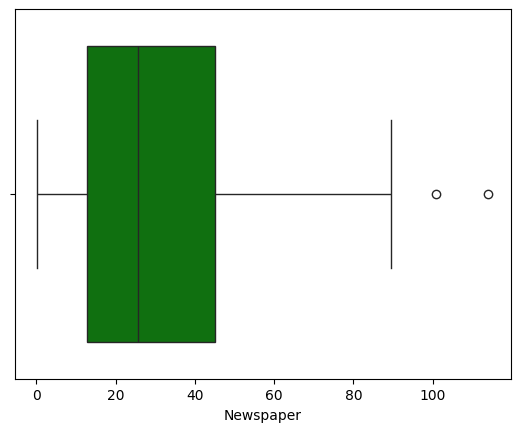

In [13]:
sns.boxplot(df['Newspaper'],orient='h',color='green')

<Axes: xlabel='Newspaper', ylabel='Density'>

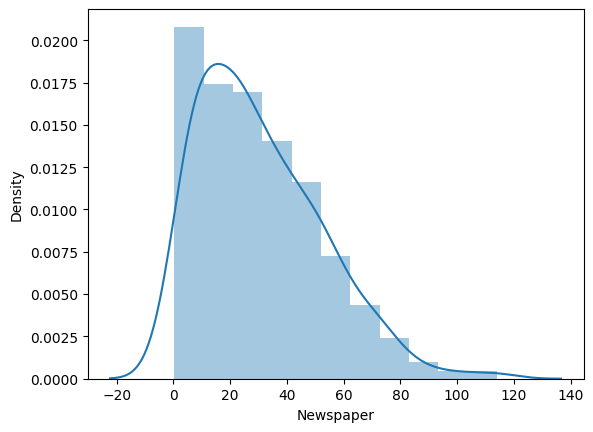

In [14]:
sns.distplot(df['Newspaper'])

<Axes: xlabel='Sales', ylabel='Density'>

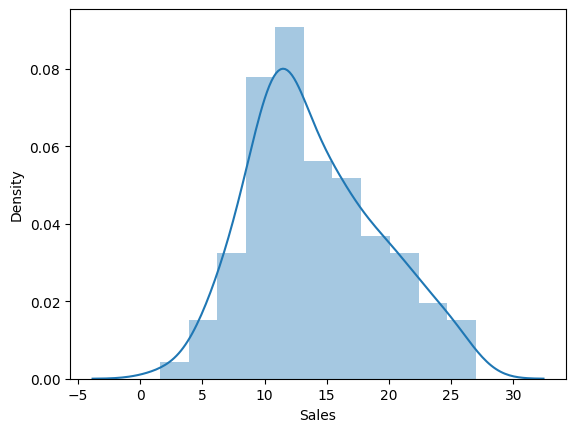

In [15]:
sns.distplot(df['Sales'])

As we see the box plot it contains no outliers

#### Scatterplot with respect to the 

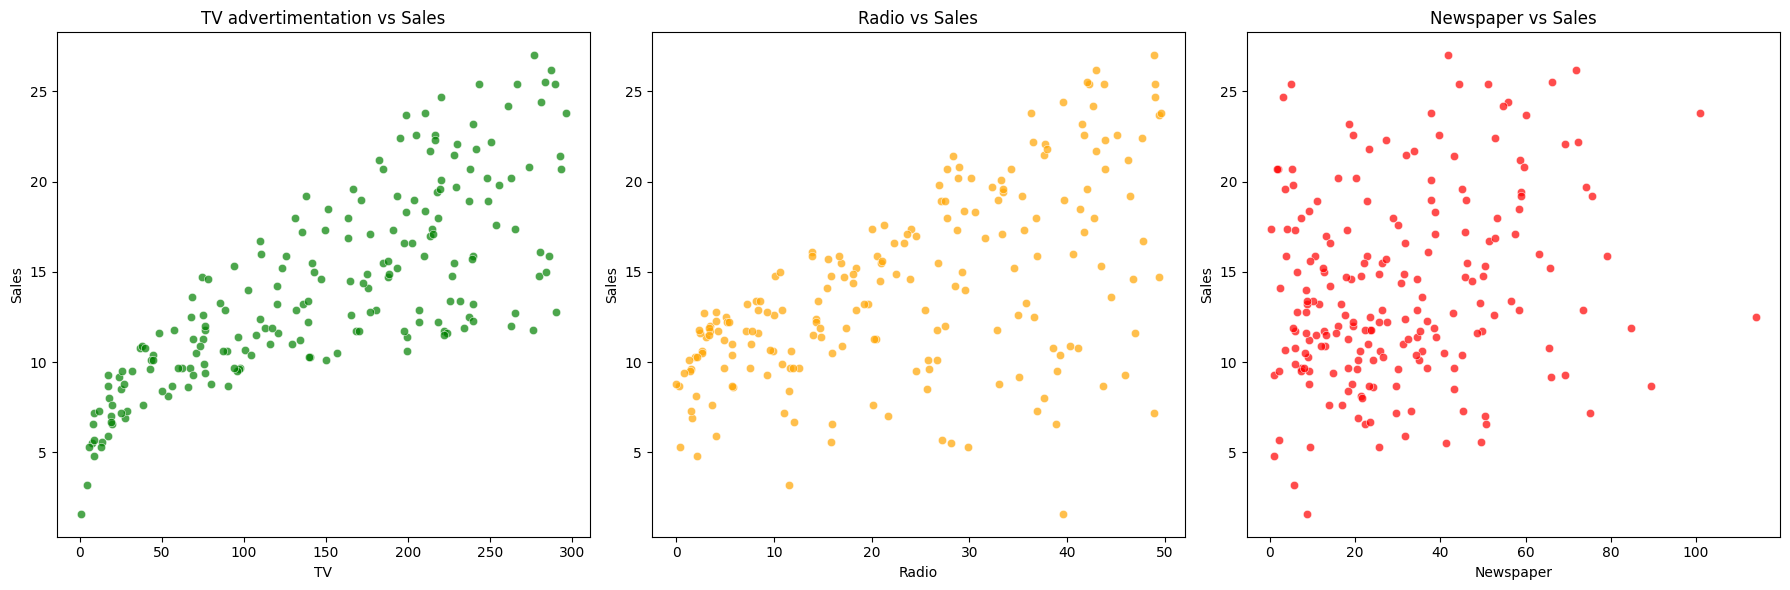

In [16]:
fig , axes = plt.subplots(1,3,figsize=(18,6))


sns.scatterplot(data=df,x='TV',y='Sales',color='green',alpha=0.7,ax=axes[0])
axes[0].set_title('TV advertimentation vs Sales')

sns.scatterplot(data=df,x='Radio',y='Sales',color='orange',alpha=0.7,ax=axes[1])
axes[1].set_title('Radio vs Sales')

sns.scatterplot(data=df,x='Newspaper',y='Sales',color='red',alpha=0.7,ax=axes[2])
axes[2].set_title('Newspaper vs Sales')

plt.tight_layout()
plt.show()

#### Pair plot

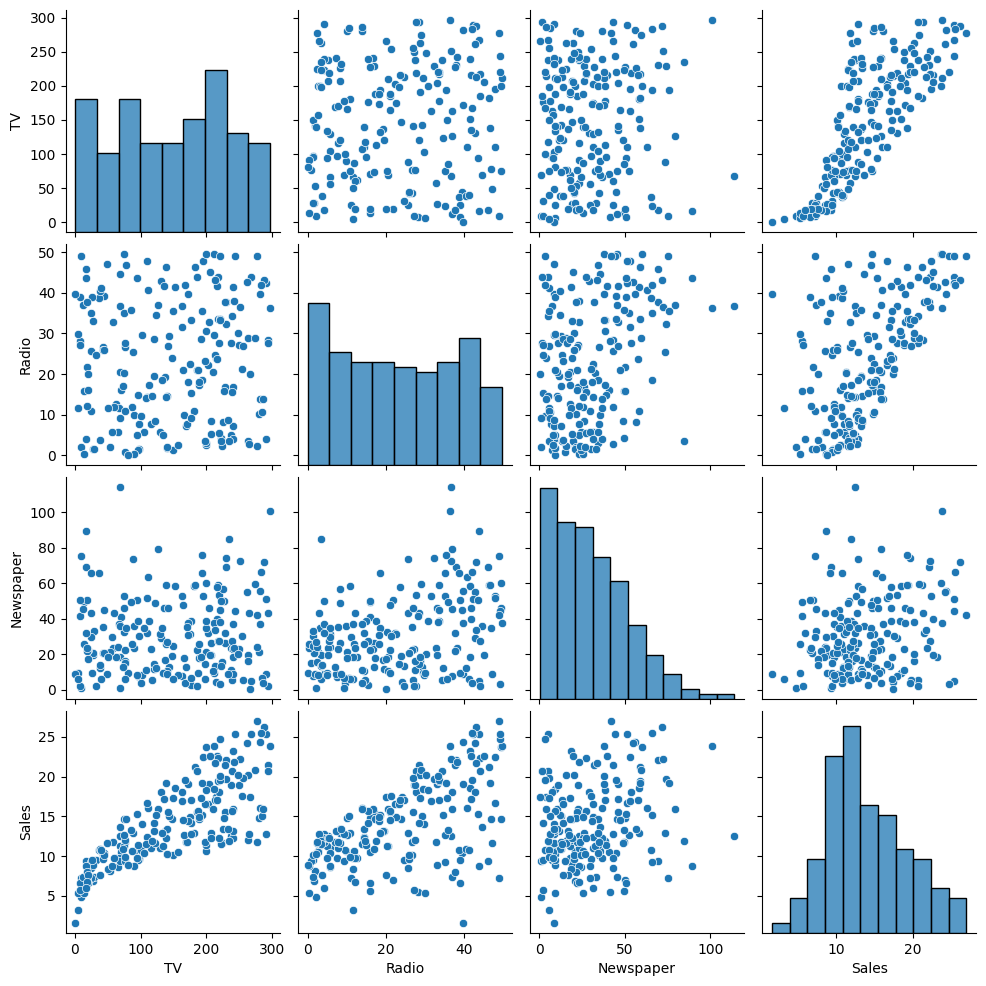

In [17]:
sns.pairplot(data = df)

#### Corelation plot

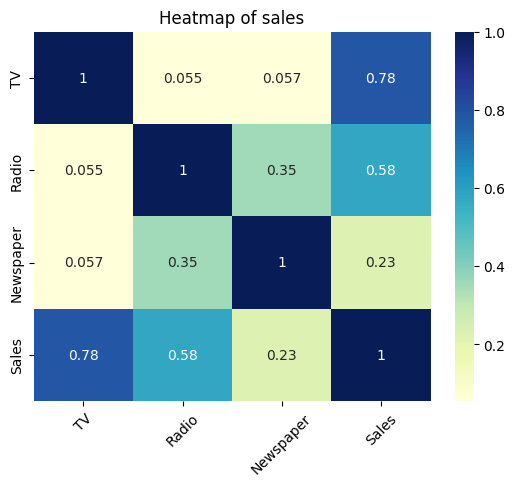

In [18]:
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.xticks(rotation=45)
plt.title("Heatmap of sales")
plt.show()

### Feature Engineering

As we see that in the correlation plot above the all three are the positive correlations then we addd one more feature of total product

In [19]:
df['Total'] = df['TV']+df['Radio']+df['Newspaper']

In [20]:
df.head()

,TV,Radio,Newspaper,Sales,Total
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='Total', ylabel='Sales'>

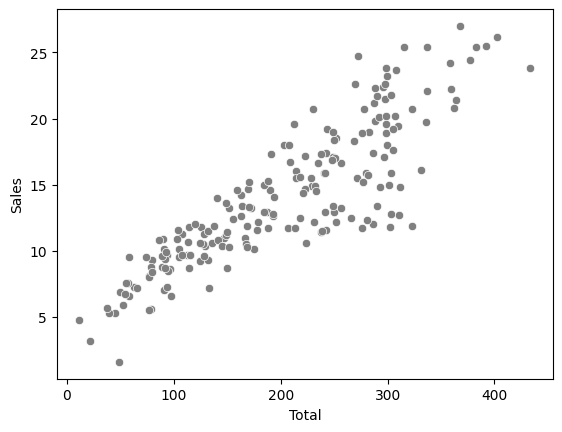

In [21]:
sns.scatterplot(data=df,x='Total',y='Sales',color='grey')

In [22]:
df.describe()

,TV,Radio,Newspaper,Sales,Total
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500,200.860500
std,85.854236,14.846809,21.778621,5.217457,92.985181
min,0.700000,0.000000,0.300000,1.600000,11.700000
25%,74.375000,9.975000,12.750000,10.375000,123.550000
50%,149.750000,22.900000,25.750000,12.900000,207.350000
75%,218.825000,36.525000,45.100000,17.400000,281.125000
max,296.400000,49.600000,114.000000,27.000000,433.600000


## Modeling And Evaluation

#### Import libraries

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

##### Dividing into X and y

In [24]:
X = df.drop(columns=['Sales'])
y = df['Sales']

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

##### Linear Regression

In [26]:
lr = LinearRegression()

# fit model
lr.fit(X_train,y_train)

# predict
y_pred = lr.predict(X_test)

print(f"R2 score for Linear Regression: {r2_score(y_test,y_pred)}")
print(f"Mean Squared Error for Linear Regression: {mean_squared_error(y_test,y_pred)}")
print(f"Mean Absolute Error for Linear Regression: {mean_absolute_error(y_test,y_pred)}")


R2 score for Linear Regression: 0.757589450077272
Mean Squared Error for Linear Regression: 4.503125945046125
Mean Absolute Error for Linear Regression: 1.6462745449078695


##### Ridge Regressor

In [27]:
rg = Ridge(alpha=0.02)

# fit model
rg.fit(X_train,y_train)

# predict
y_pred = rg.predict(X_test)

print(f"R2 score for Ridge Regression: {r2_score(y_test,y_pred)}")
print(f"Mean Squared Error for Ridge Regression: {mean_squared_error(y_test,y_pred)}")
print(f"Mean Absolute Error for Ridge Regression: {mean_absolute_error(y_test,y_pred)}")

R2 score for Ridge Regression: 0.757589293257288
Mean Squared Error for Ridge Regression: 4.503128858203735
Mean Absolute Error for Ridge Regression: 1.646275110284313


##### Random Forest Regression

In [28]:
rf = RandomForestRegressor(max_features=8,n_estimators=20)

# fit model
rf.fit(X_train,y_train)

# predict
y_pred = rf.predict(X_test)

print(f"R2 score for Random Forest Regression: {r2_score(y_test,y_pred)}")
print(f"Mean Squared Error for Random Forest Regression: {mean_squared_error(y_test,y_pred)}")
print(f"Mean Absolute Error for Random Forest Regression: {mean_absolute_error(y_test,y_pred)}")

R2 score for Random Forest Regression: 0.9511460919423825
Mean Squared Error for Random Forest Regression: 0.9075318750000019
Mean Absolute Error for Random Forest Regression: 0.7538750000000005


##### Gradient Boost Regression

In [29]:
gb = GradientBoostingRegressor()

# fit model
gb.fit(X_train,y_train)

# Predict
y_pred = gb.predict(X_test)

print(f"R2 score for Gradient Boost Regression: {r2_score(y_test,y_pred)}")
print(f"Mean Squared Error for Gradient Boost Regression: {mean_squared_error(y_test,y_pred)}")
print(f"Mean Absolute Error for Gradient Boost Regression: {mean_absolute_error(y_test,y_pred)}")

R2 score for Gradient Boost Regression: 0.9731806454948629
Mean Squared Error for Gradient Boost Regression: 0.4982082303759884
Mean Absolute Error for Gradient Boost Regression: 0.5585564656066727


#### As we can see that Gradient Boost Regression is better than all of them giving best results for the dataset